# Zadanie 2.2
## Sortowanie II

**Link:** https://colab.research.google.com/github/marcinsawinski/UEP_KIE_ASD_LAB_PROG/blob/master/asd_2_2_solution.ipynb

**1. Napisz funkcję implementującą sortowanie przez scalanie.**

## Teoria

1. function Merge
2. function Sort

# Rozwiązanie

In [1]:
def merge(left, right):
    A = []
    i ,j = 0, 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            A.append(left[i])
            i += 1
        else:
            A.append(right[j])
            j += 1
    A += left[i:]
    A += right[j:]
    return A

def mergesort(A):
    if len(A) > 1:
        q = len(A) // 2
        left = mergesort(A[:q])
        right = mergesort(A[q:])
        return merge(left, right)
    return A

mergesort([2,8,3,6,5,9])

[2, 3, 5, 6, 8, 9]

# Dodatkowe

In [2]:
# wypisz kroki
def merge(left, right):
    A = []
    i ,j = 0, 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            A.append(left[i])
            i += 1
        else:
            A.append(right[j])
            j += 1
    A += left[i:]
    A += right[j:]
    return A

def mergesort(A):
    print('in:', A)
    if len(A) > 1:
        q = len(A) // 2
        left = mergesort(A[:q])
        right = mergesort(A[q:])
        print('merge:',left,right)
        result = merge(left, right)
        print('out: ',result)
        return result
    return A

mergesort([2,8,3,2])

in: [2, 8, 3, 2]
in: [2, 8]
in: [2]
in: [8]
merge: [2] [8]
out:  [2, 8]
in: [3, 2]
in: [3]
in: [2]
merge: [3] [2]
out:  [2, 3]
merge: [2, 8] [2, 3]
out:  [2, 2, 3, 8]


[2, 2, 3, 8]

In [3]:
# zlicz koszty
def merge_with_cost(left, right):
    A = []
    i ,j = 0, 0
    c[3]+=1
    while i < len(left) and j < len(right):
        c[4]+=1
        if left[i] <= right[j]:
            A.append(left[i])
            i += 1
        else:
            A.append(right[j])
            j += 1
    A += left[i:]
    A += right[j:]
    return A

def mergesort_with_cost(A):
    c[0] += 1
    if len(A) > 1:
        q = len(A) // 2
        c[2]+=1
        left = mergesort_with_cost(A[:q])
        right = mergesort_with_cost(A[q:])
        result = merge_with_cost(left, right)
        return result
    c[1] += 1
    return A
c = [0 for x in range(5)]
l = [2,8,3,2]
mergesort_with_cost(l)
print('len:',len(l),'cost:', c)

len: 4 cost: [7, 4, 3, 3, 5]


In [4]:
# przygotuj wykres
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import randrange

def show_plot(cost):
    df = pd.DataFrame(cost)
    df.columns=['type','n','cost','c1','c2','c3','c4','c5','c6','c7']
    df.sort_values(['type','n'], inplace=True)

    colors = {'AI':'red', 'DI':'red', 'RI':'red', 'AM':'blue', 'DM':'blue', 'RM':'blue'}
    markers = {'AI':':', 'DI':'-', 'RI':'--', 'AM':':', 'DM':'-', 'RM':'--'}
    
    fig, ax = plt.subplots(figsize=(12,6))
    for idx, gp in df.groupby('type'):
        gp.plot(x='n', y='cost', c = colors[idx], ax=ax, label=idx, style=markers[idx])
    return df

In [5]:
def insertionSort_with_cost(A):
   def add_c3():
      c[3]+=1
      return True

   for j in range(1,len(A)):
      c[0]+=1
      k = A[j]
      c[1]+=1
      i = j-1
      c[2]+=1
      while (add_c3() and i>=0 and A[i]>k):
         A[i+1]=A[i]
         c[4]+=1
         i = i-1
         c[5]+=1
      A[i+1] = k
      c[6]+=1
   return c

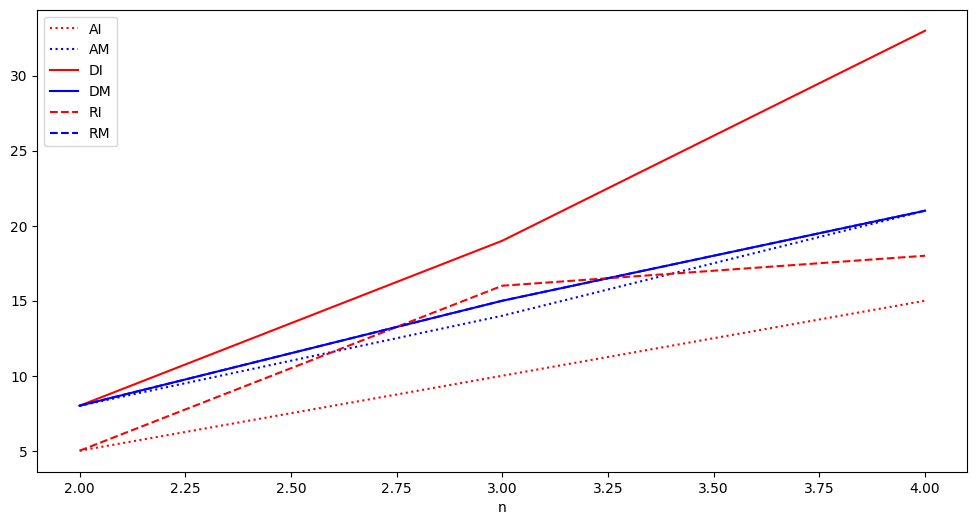

In [6]:
cost=[]
# Zacznij od range(2,10,1) do range(2,500,1)
# Potem range(500,3000,100)

#max 3000
for n in range(2,5,1):

    A = [x for x in range(1,n+1,1)]
    D = [x for x in range(n,0,-1)]
    R = [randrange(n) for x in range(n)]
    
    c = [0 for x in range(7)]
    mergesort_with_cost(A)
    cost.append(['AM',n]+[sum(c)]+c)
    
    c = [0 for x in range(7)]
    mergesort_with_cost(D)
    cost.append(['DM',n]+[sum(c)]+c)
    
    c = [0 for x in range(7)]
    mergesort_with_cost(R)
    cost.append(['RM',n]+[sum(c)]+c)
    
    c = [0 for x in range(7)]
    insertionSort_with_cost(A)
    cost.append(['AI',n]+[sum(c)]+c)

    c = [0 for x in range(7)]
    insertionSort_with_cost(D)
    cost.append(['DI',n]+[sum(c)]+c)
    
    c = [0 for x in range(7)]
    insertionSort_with_cost(R)
    cost.append(['RI',n]+[sum(c)]+c)

df = show_plot(cost)

In [10]:
# pokaż koszty
df[df.n==4]

,type,n,cost,c1,c2,c3,c4,c5,c6,c7
15,AI,4,15,3,3,3,3,0,0,3
12,AM,4,21,7,4,3,3,4,0,0
16,DI,4,33,3,3,3,9,6,6,3
13,DM,4,21,7,4,3,3,4,0,0
17,RI,4,18,3,3,3,4,1,1,3
14,RM,4,21,7,4,3,3,4,0,0


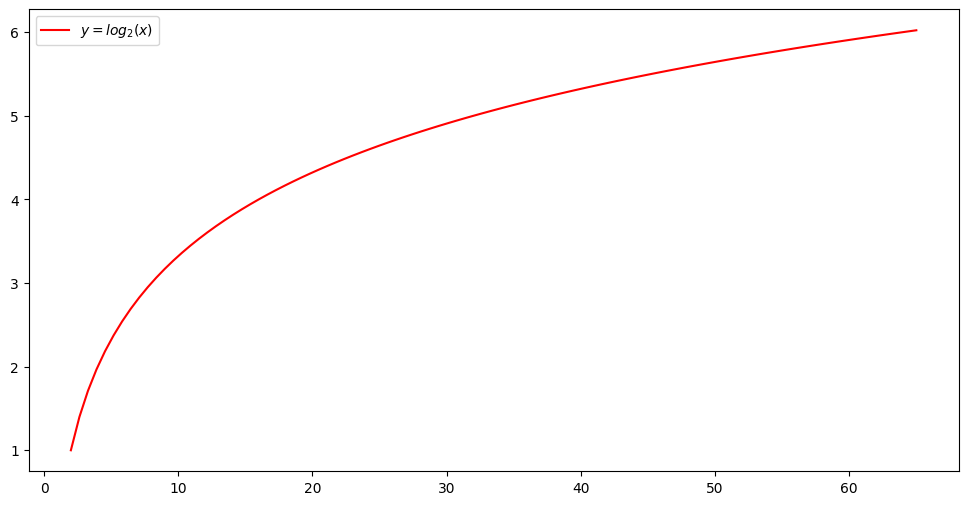

In [8]:
# funkcja logarytm 2

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(2,65,100)

plt.figure(figsize=(12,6))
plt.plot(x, np.log2(x), 'r-', label=r'$y = log_2(x)$')
plt.legend(loc="upper left")
plt.show()

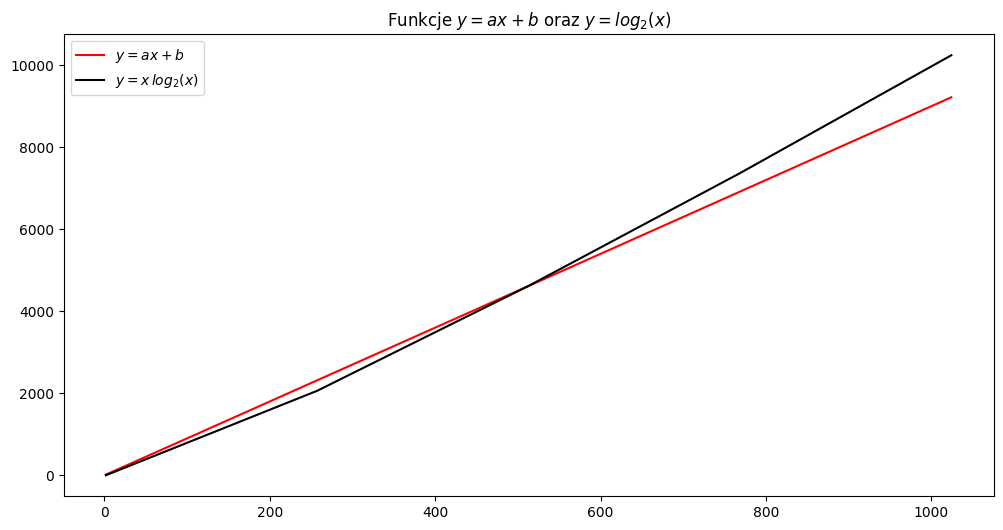

In [11]:
# funkcja x log(x) vs liniowa
x = np.linspace(2,1024,5)

plt.figure(figsize=(12,6))
plt.plot(x, x*9, 'r-', label=r'$y=ax+b$')
plt.plot(x, x*np.log2(x), 'k-', label=r'$y = x\,log_2(x)$')
plt.title(r'Funkcje $y = ax+b$ oraz $y = log_2(x)$')
plt.legend(loc="upper left")
plt.show()